Reference Project:https://towardsdatascience.com/analysing-whatsapp-group-messages-using-python-a17306d3ccad

## Objectives  

This project can be used to showcase:
* ### Data analytics skills:  
    Data visualization- who sent most messages  
    who used most emojis  
    what time are people most active  
    who are the most and least active people, margin of difference   
    who sent most images, by how much compared to others  
    who sent most website links, comparison with others  
    Use **Tableau** for visualization
    
    
* ### ML skills:
    NLP Use techniques most common words used  
    topic modelling to find topics of discussion in the entire chat, topic of the week, month, day  
    find and identiy common topics, and sentiments related to the topics, such as sentiment about jigsaw should be negative  
    perform sentiment analysis on the topics, example sentiment about jigsaw should be negative most probably
    
More Ideas needed

### Import modules

In [1]:
import emoji
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
## Set display options
pd.set_option('display.max_colwidth',75)
pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', 20)

In [3]:
## Read chat file
file_loc = 'Dataset/WhatsApp Chat with IIM IPBA-4 Students Group.txt'

df = pd.read_csv(file_loc, delimiter='\t', header=None, names=['text'])
df[['datetime_str','Text']] = df["text"].str.split(" - ", 1, expand=True)
df = df.drop(columns = ['text'])

#### As seen below the data file is not properly stored

In [4]:
df.sample(9)

datetime_str  \
5542   7/19/20, 15:05   
8858   11/1/20, 14:26   
3001    5/3/20, 13:15   
8031   9/26/20, 10:06   
9273   11/1/20, 15:17   
1394   4/18/20, 10:26   
1372   4/13/20, 18:18   
8212  10/10/20, 11:40   
9174   11/1/20, 15:04   

                                                                            Text  
5542                        Abdul Nadaf IPBA: spoken like a true statistician...  
8858                                                             Romita IPBA: Ok  
3001                   Chandrika IPBA: Click on the dropdown besides server name  
8031                                        Sukanta Ex IPBA: We have class today  
9273                                            Sourabh Patil IPBA: Thanks all 🙌  
1394  Aj IPBA: Guys let’s all rate 1-2 out of 10 for the session so that jigs...  
1372                           Sanchit IPBA: Working now. Thanks for checking 👍🏻  
8212                                                Shaileshwaram IPBA: I got it  
9174                                               Avinash IPBA: <Media omitted>

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime_str  9327 non-null   object
 1   Text          8460 non-null   object
dtypes: object(2)
memory usage: 146.1+ KB
None


Drop rows with all na values

In [6]:
df.dropna(how='all', inplace=True)
df = df.reset_index(drop=True)

**Will Perform Data cleaning**

Create Flagging columns to show rows with error   
`TimeFlag`, `TextFlag`, `Flag` == 0 means error

In [7]:
## Check Text column for None values
def time_flag(text):
    pattern = '\d+/\d+\d+, \d+:\d+'
    if bool(re.findall(pattern, text)):
        return 1
    else:
        return 0

In [8]:
df['TimeFlag'] = df.datetime_str.apply(time_flag) 

print('TimeFlags')
print(df.TimeFlag.value_counts())
print('882 rows with problems')

TimeFlags
1    8445
0     882
Name: TimeFlag, dtype: int64
882 rows with problems


In [9]:
## Check Text column for None values
def text_flag(text):
    if text == None:
        return 0
    else:
        return 1

In [10]:
df['TextFlag'] = df.Text.apply(text_flag)

print('TextFlags')
print(df.TextFlag.value_counts())
print('867 rows with problems')

TextFlags
1    8460
0     867
Name: TextFlag, dtype: int64
867 rows with problems


In [11]:
df.head(20)

datetime_str  \
0                                                               2/26/20, 14:46   
1                                                                2/8/20, 10:57   
2                                                               2/26/20, 14:46   
3                                                               2/26/20, 14:47   
4                                                               2/26/20, 14:50   
5                                                               2/26/20, 14:51   
6                                                               2/26/20, 15:07   
7                                                               2/26/20, 15:07   
8                                                               2/26/20, 15:41   
9                                                               2/26/20, 15:42   
10                                  The Golden Rules for posting on this Group   
11  * Always keep to the purpose of the group! Don’t share irrelevant messa...   
12  *  Do not spam the group by sending large size entertaining pictures an...   
13  *  Post your message in one single chunk of text, don’t post every word...   
14  *  Do not have one-on-one conversations in the group. Switch to private...   
15  *  Limit your wishes to textual message where possible. We are sure, ev...   
16  *  If a message asks for a positive response like an RSVP, don’t reply ...   
17  *  If someone asks a question and you don’t know the answer don’t respo...   
18  *  Please don’t send in a hundred “thank you” messages. If you feel gra...   
19  *  If someone asks a question of a personal nature (like asking for adv...   

                                                                          Text  \
0   Messages and calls are end-to-end encrypted. No one outside of this cha...   
1                          Babi IPBA created group "IIM IPBA-4 Students Group"   
2                                                          Babi IPBA added you   
3                     Babi IPBA: Mazhar, Susandeep - welcome to students group   
4                                                       Mazhar: Hello Everyone   
5                Mazhar: Are there any important updates if any, am I missing?   
6                                                      Susandeep IPBA: Hi Babi   
7             Susandeep IPBA: I believe another group is also created for same   
8   Babi IPBA: This group is not Jigsaw announcement. This is internal stud...   
9   Babi IPBA: We want this group to be active and sharing useful informati...   
10                                                                        None   
11                                                                        None   
12                                                                        None   
13                                                                        None   
14                                                                        None   
15                                                                        None   
16                                                                        None   
17                                                                        None   
18                                                                        None   
19                                                                        None   

    TimeFlag  TextFlag  
0          1         1  
1          1         1  
2          1         1  
3          1         1  
4          1         1  
5          1         1  
6          1         1  
7          1         1  
8          1         1  
9          1         1  
10         0         0  
11         0         0  
12         0         0  
13         0         0  
14         0         0  
15         0         0  
16         0         0  
17         0         0  
18         0         0  
19         0         0

In [12]:
# # Error Type1
df[(df.TimeFlag==0) & (df.TextFlag==0)].head()

datetime_str  \
10                                  The Golden Rules for posting on this Group   
11  * Always keep to the purpose of the group! Don’t share irrelevant messa...   
12  *  Do not spam the group by sending large size entertaining pictures an...   
13  *  Post your message in one single chunk of text, don’t post every word...   
14  *  Do not have one-on-one conversations in the group. Switch to private...   

    Text  TimeFlag  TextFlag  
10  None         0         0  
11  None         0         0  
12  None         0         0  
13  None         0         0  
14  None         0         0

In [13]:
# # Error Type2
df[(df.TimeFlag==0) & (df.TextFlag==1)].head()

datetime_str  \
924                                                                     Use menu   
1528  Chebyshev’s Theorem says that 1 − 1/(1.752^2) = 0.673 of the values wil...   
3415                                                         I am always getting   
3507                      We have scheduled an open office session with our IPBA   
4985                                                 Topic:  Business Case study   

                                                                            Text  \
924   file- open to open the csv file to curtail this kind of issue. If you d...   
1528  0.672 =  67.3% of the time, Matt’s reading speed will be between 15 and...   
3415   "Error: Unable to establish connection with R session" ..Does anyone g...   
3507                        Program Director from IIM Indore and Jigsaw Academy.   
4985                                                     Time Series Forecasting   

      TimeFlag  TextFlag  
924          0         1  
1528         0         1  
3415         0         1  
3507         0         1  
4985         0         1

In [14]:
## Error Type3
df[(df.TimeFlag==1) | (df.TextFlag==0)] ## Great Work

datetime_str  \
0                                                                 2/26/20, 14:46   
1                                                                  2/8/20, 10:57   
2                                                                 2/26/20, 14:46   
3                                                                 2/26/20, 14:47   
4                                                                 2/26/20, 14:50   
5                                                                 2/26/20, 14:51   
6                                                                 2/26/20, 15:07   
7                                                                 2/26/20, 15:07   
8                                                                 2/26/20, 15:41   
9                                                                 2/26/20, 15:42   
10                                    The Golden Rules for posting on this Group   
11    * Always keep to the purpose of the group! Don’t share irrelevant messa...   
12    *  Do not spam the group by sending large size entertaining pictures an...   
13    *  Post your message in one single chunk of text, don’t post every word...   
14    *  Do not have one-on-one conversations in the group. Switch to private...   
15    *  Limit your wishes to textual message where possible. We are sure, ev...   
16    *  If a message asks for a positive response like an RSVP, don’t reply ...   
17    *  If someone asks a question and you don’t know the answer don’t respo...   
18    *  Please don’t send in a hundred “thank you” messages. If you feel gra...   
19    *  If someone asks a question of a personal nature (like asking for adv...   
20    *  The group is not a political. No arguing, no heated opinions, no fea...   
21    *  Never EVER use this group to berate someone else or air grievances. ...   
22    *  Don’t send data-insensitive messages. No-one wants their last 3GB us...   
23      If you are not sure, ask yourself these three questions before you post:   
24                                                       1.    Is this relevant?   
25                                                      2.    Is this necessary?   
26                                            3.    Is this a good time to post?   
27                                                                2/26/20, 16:32   
28                                                                2/26/20, 16:32   
29                                                                2/26/20, 16:33   
30                                                                2/26/20, 16:35   
31                                                                2/26/20, 16:47   
32                                                                2/26/20, 16:49   
33                                                                2/26/20, 16:49   
34                                                                2/26/20, 16:50   
35                                                                2/26/20, 16:58   
36                                                                2/26/20, 16:58   
37                                                                2/26/20, 17:04   
38                                                                2/26/20, 17:04   
39                                                                2/26/20, 17:04   
40                                                                2/26/20, 17:11   
41                                                                2/26/20, 17:11   
42                                                                2/26/20, 17:14   
43                                                                2/26/20, 17:14   
44    If we talk about different roles in Data Science based on the intersect...   
45                       Domain expertise and computer science by Data Engineers   
46                              Domain Expertise and Mathematics by Data Analyst   
47                                  

In [15]:
## Replaced `None` values with empty string '' to facilitate addition
df.fillna('', inplace=True)
df[df.Text==''].head()

datetime_str  \
10                                  The Golden Rules for posting on this Group   
11  * Always keep to the purpose of the group! Don’t share irrelevant messa...   
12  *  Do not spam the group by sending large size entertaining pictures an...   
13  *  Post your message in one single chunk of text, don’t post every word...   
14  *  Do not have one-on-one conversations in the group. Switch to private...   

   Text  TimeFlag  TextFlag  
10              0         0  
11              0         0  
12              0         0  
13              0         0  
14              0         0

In [16]:
## Move Text from datetime_str col to Text col
for ind, row in df.iterrows():
    if df.loc[ind, 'TimeFlag'] == 0:
        df.loc[ind, 'Text'] = df.loc[ind, 'datetime_str'] + ' ' + df.loc[ind, 'Text']
        df.loc[ind, 'datetime_str'] = 0
        df.loc[ind, 'datetime_str'] = 0
        df.loc[ind, 'TextFlag'] = 1

In [17]:
# df[df.TextFlag==0] ## Fixed all TextFlag Errors so drop col now
df.drop(columns=['TextFlag'], inplace = True)

In [18]:
df[df.TimeFlag==0].head()

datetime_str  \
10            0   
11            0   
12            0   
13            0   
14            0   

                                                                          Text  \
10                                 The Golden Rules for posting on this Group    
11  * Always keep to the purpose of the group! Don’t share irrelevant messa...   
12  *  Do not spam the group by sending large size entertaining pictures an...   
13  *  Post your message in one single chunk of text, don’t post every word...   
14  *  Do not have one-on-one conversations in the group. Switch to private...   

    TimeFlag  
10         0  
11         0  
12         0  
13         0  
14         0

In [19]:
## Move Text from cols with TimeFlag =0 to Text col above

In [20]:
## Drop 882rows with problems in date
drop_index = df[df.datetime_str==0].index
df.drop(drop_index, axis=0,inplace = True)
# drop_index.shape

In [21]:
df.drop(columns='TimeFlag', inplace = True)

In [22]:
df.head(16)

datetime_str  \
0   2/26/20, 14:46   
1    2/8/20, 10:57   
2   2/26/20, 14:46   
3   2/26/20, 14:47   
4   2/26/20, 14:50   
5   2/26/20, 14:51   
6   2/26/20, 15:07   
7   2/26/20, 15:07   
8   2/26/20, 15:41   
9   2/26/20, 15:42   
27  2/26/20, 16:32   
28  2/26/20, 16:32   
29  2/26/20, 16:33   
30  2/26/20, 16:35   
31  2/26/20, 16:47   
32  2/26/20, 16:49   

                                                                          Text  
0   Messages and calls are end-to-end encrypted. No one outside of this cha...  
1                          Babi IPBA created group "IIM IPBA-4 Students Group"  
2                                                          Babi IPBA added you  
3                     Babi IPBA: Mazhar, Susandeep - welcome to students group  
4                                                       Mazhar: Hello Everyone  
5                Mazhar: Are there any important updates if any, am I missing?  
6                                                      Susandeep IPBA: Hi Babi  
7             Susandeep IPBA: I believe another group is also created for same  
8   Babi IPBA: This group is not Jigsaw announcement. This is internal stud...  
9   Babi IPBA: We want this group to be active and sharing useful informati...  
27  Sudhir Kumar Das Ex IPBA: Most of us might think that data scientist sp...  
28                                   Sudhir Kumar Das Ex IPBA: <Media omitted>  
29  Sudhir Kumar Das Ex IPBA: 80% is spent in data collection, cleaning, or...  
30  Sudhir Kumar Das Ex IPBA: So, it's very important we spend most of our ...  
31  Srikanth IPBA: Interesting pie diagram. Any idea if we have the option ...  
32                                                    Sukanta Ex IPBA: Depends

Extract all names and numbers  
pattern search for a ':', save all before the : to a list, and take set

In [23]:
## Returns msg sender name, or 0 for a notif
def name_extractor(text):
    pattern = '\S:'
    pattern_2 = ' IPBA'
    match = re.search(pattern, text) ## will return span of indices if pattern found else None
    if match:
        end_index = match.span()[1]-1
        name = text[:end_index]
        match_2 = re.search(pattern_2, name)
        if match_2:
            name = name.replace(pattern_2, '')
        return name
    else:
        return 'NOTIF'
    
def name_remover(text):
    pattern = '\S:'
    match = re.search(pattern, text)
    if match:
        end_index = match.span()[1]+1
        text = text[end_index:]
    return text

In [24]:
df['Sender'] = df.Text.apply(name_extractor)
df['Text'] = df.Text.apply(name_remover)

In [25]:
df.head()

datetime_str  \
0  2/26/20, 14:46   
1   2/8/20, 10:57   
2  2/26/20, 14:46   
3  2/26/20, 14:47   
4  2/26/20, 14:50   

                                                                         Text  \
0  Messages and calls are end-to-end encrypted. No one outside of this cha...   
1                         Babi IPBA created group "IIM IPBA-4 Students Group"   
2                                                         Babi IPBA added you   
3                               Mazhar, Susandeep - welcome to students group   
4                                                              Hello Everyone   

   Sender  
0   NOTIF  
1   NOTIF  
2   NOTIF  
3    Babi  
4  Mazhar

In [26]:
df[df.Sender=='NOTIF'].shape
# 50 notifications in the chat

(50, 3)

------

### Get sender names from messages

In [27]:
members = {}
for ind, row in df.iterrows():
    name = df.loc[ind, 'Sender']
    if name in members:
        members[name] += 1
    else:
        members[name] = 1

In [28]:
members ## Dict with keys as names of all members, values as no. of texts they've sent

{'NOTIF': 50,
 'Babi': 234,
 'Mazhar': 372,
 'Susandeep': 180,
 'Sudhir Kumar Das Ex': 65,
 'Srikanth': 172,
 'Sukanta Ex': 376,
 'Shaileshwaram': 252,
 'Pankaj Rana': 172,
 'Saroj Ex': 47,
 'Bharat': 176,
 'Gaurav Pramod': 83,
 'Manasi': 160,
 'Lakshminarayan': 108,
 'Vinayak Ex': 8,
 'Dinesh': 54,
 'Prashik Patil': 96,
 'Ankit Singh': 116,
 'Suraj Chavan': 30,
 'Amit Chopra': 276,
 'Saurav Samantaray': 213,
 'Girish Kumar': 53,
 'Sundar Nagarajan': 8,
 'Preeti': 88,
 'Archana': 20,
 'Sandy': 90,
 'Romita': 85,
 'Debraj Saha': 116,
 'Ankit Jain': 13,
 'Rahul': 110,
 'Durga Ex': 6,
 'Akshay': 69,
 'Dr Kalyan Parimi': 97,
 'Surupa': 104,
 'Swarnapava Ray': 62,
 'Suchitra Mayuri': 51,
 'Guru Ex': 8,
 'Boojashree': 84,
 'Swayam': 40,
 'Adarsh Baluapuri': 52,
 'Raj Gaurav': 560,
 'Gaurav Mahajan': 181,
 'Uttam Agrawal': 122,
 'Avi': 72,
 'Akansha Jain': 56,
 'Chandrika': 53,
 'Prasanna': 60,
 'Kajal': 33,
 'Neerav': 337,
 'Lakshita Bhatia Ex': 42,
 'Saili': 83,
 'Aditi': 72,
 'Tultul': 50,

In [29]:
del members['NOTIF']
df.drop(df[df.Sender=='NOTIF'].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

print('Dropped Notifications')

Dropped Notifications


In [30]:
len(members)

84

In [31]:
import json

In [33]:
# json_object=json.dump(members, indent=4)

In [37]:
# print(json_object)

------

Get `datetime_str` as `datetime` object format

In [38]:
df['datetime'] = pd.to_datetime(df['datetime_str'], format='%m/%d/%y, %H:%M')
df.drop(columns=['datetime_str'], inplace=True)

KeyError: 'datetime_str'

In [ ]:
df.head()

In [39]:
# Create new fields for day, hour, month
df['day_of_week'] = df['datetime'].dt.dayofweek + 1
df['hour_of_day'] = df['datetime'].dt.hour
df['month_of_year'] = df['datetime'].dt.month

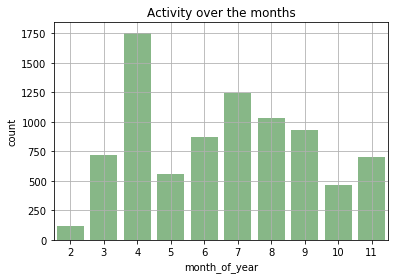

In [40]:
sns.countplot(df.month_of_year, color='green', alpha = 0.5)
plt.title('Activity over the months')
plt.grid()

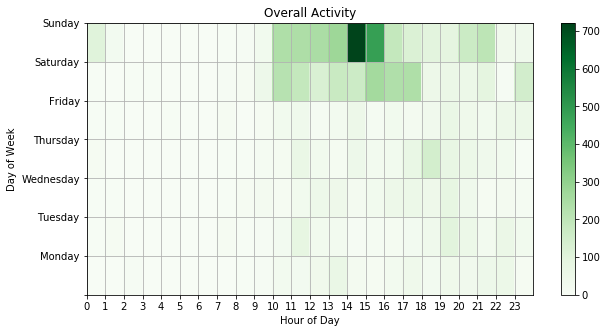

In [41]:
# Create new Dataframe containing data counts
heatmap_data = df.groupby(['day_of_week', 'hour_of_day']).size()
heatmap_data = heatmap_data.unstack()
heatmap_data = heatmap_data.fillna(0).astype('int16')

# Create heatmap
plt.figure(figsize=(10,5))
plt.pcolor(heatmap_data, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity')
plt.xticks(np.arange(24))
plt.yticks(np.arange(8), ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()
plt.colorbar()
plt.show()

In [42]:
pd.reset_option('display.max_rows')

In [43]:
df.head()

Text     Sender  \
0          Mazhar, Susandeep - welcome to students group       Babi   
1                                         Hello Everyone     Mazhar   
2  Are there any important updates if any, am I missing?     Mazhar   
3                                                Hi Babi  Susandeep   
4       I believe another group is also created for same  Susandeep   

             datetime  day_of_week  hour_of_day  month_of_year  
0 2020-02-26 14:47:00            3           14              2  
1 2020-02-26 14:50:00            3           14              2  
2 2020-02-26 14:51:00            3           14              2  
3 2020-02-26 15:07:00            3           15              2  
4 2020-02-26 15:07:00            3           15              2

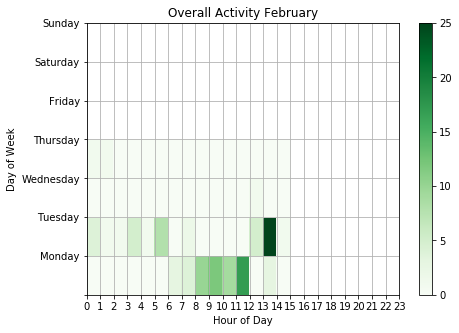

In [44]:
df_feb = df[df['month_of_year'] == 2]
heat_feb = df_feb.groupby(['day_of_week', 'hour_of_day']).size()
heat_feb = heat_feb.unstack()
heat_feb = heat_feb.fillna(0).astype('int16')
# heatmap_data

# Create heatmap
plt.figure(figsize=(7,5))
plt.pcolor(heat_feb, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity February')
plt.xticks(np.arange(24))
plt.yticks(np.arange(8), ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()
plt.colorbar()
plt.show()

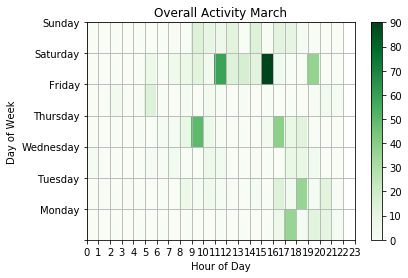

In [45]:
df_mar = df[df['month_of_year'] == 3]
heat_march = df_mar.groupby(['day_of_week', 'hour_of_day']).size()
heat_march = heat_march.unstack()
heat_march = heat_march.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_march, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity March')
plt.xticks(np.arange(24))
plt.yticks(np.arange(8), ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()
plt.colorbar()
plt.show()

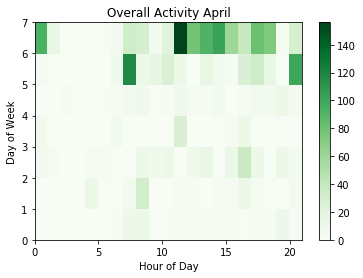

In [46]:
df_april = df[df['month_of_year'] == 4]
heat_april = df_april.groupby(['day_of_week', 'hour_of_day']).size()
heat_april = heat_april.unstack()
heat_april = heat_april.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_april, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity April')
plt.colorbar()
plt.show()

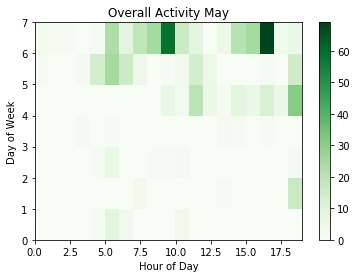

In [47]:
df_may = df[df['month_of_year'] == 5]
heat_may = df_may.groupby(['day_of_week', 'hour_of_day']).size()
heat_may = heat_may.unstack()
heat_may = heat_may.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_may, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity May')
plt.colorbar()
plt.show()


### Get a another heat map comparing all week activity in month

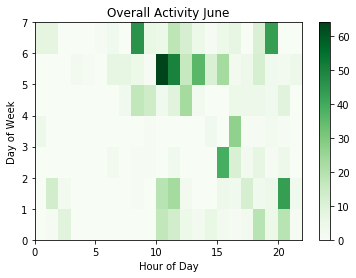

In [48]:
df_june = df[df['month_of_year'] == 6]
heat_june = df_june.groupby(['day_of_week', 'hour_of_day']).size()
heat_june = heat_june.unstack()
heat_june = heat_june.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_june, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity June')
plt.colorbar()
plt.show()

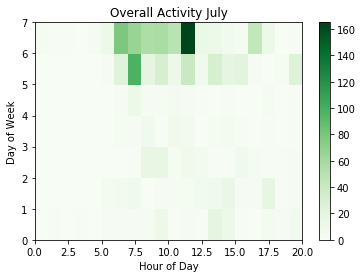

In [49]:
df_july = df[df['month_of_year'] == 7]
heat_july = df_july.groupby(['day_of_week', 'hour_of_day']).size()
heat_july = heat_july.unstack()
heat_july = heat_july.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_july, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity July')
plt.colorbar()
plt.show()

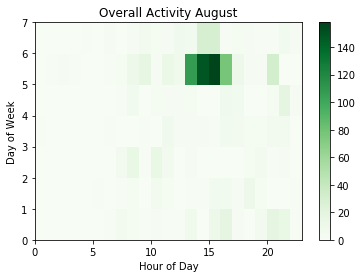

In [50]:
df_aug = df[df['month_of_year'] == 8]
heat_aug = df_aug.groupby(['day_of_week', 'hour_of_day']).size()
heat_aug = heat_aug.unstack()
heat_aug = heat_aug.fillna(0).astype('int16')
# # Create heatmap
plt.pcolor(heat_aug, cmap='Greens')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.title('Overall Activity August')
plt.colorbar()
plt.show()

--------

Messages by Sender

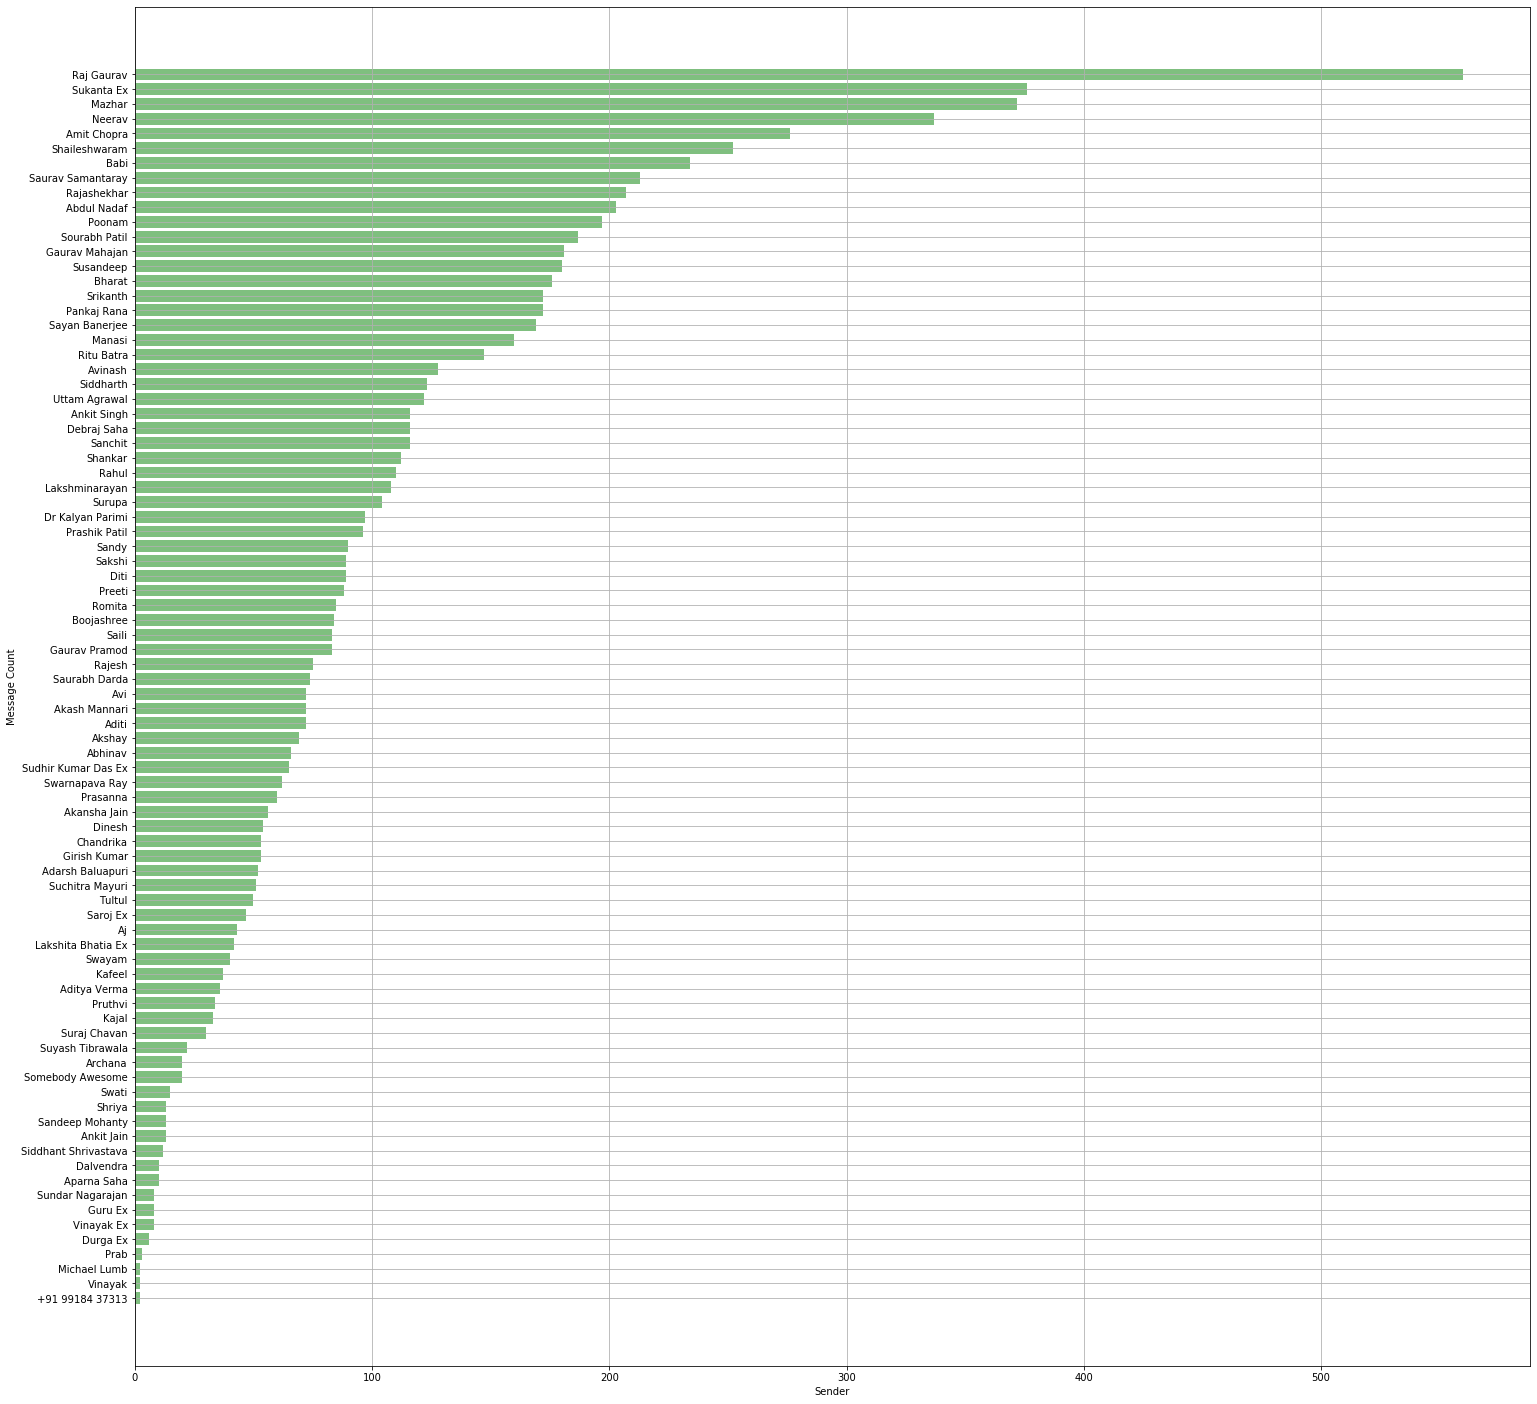

In [51]:
# Create sender counts as a series
sender_count_series = df.groupby(['Sender']).size().sort_values(ascending=True)

# Create sender counts series as a DataFrame
sender_count_df = pd.DataFrame(sender_count_series)

# Reset index in order to name columns correctly
sender_count_df = sender_count_df.reset_index()
sender_count_df.columns = ['sender', 'count']

# Plot bar chart with sender message counts
plt.figure(figsize=(25, 25))
plt.barh(sender_count_df['sender'], sender_count_df['count'], color='green', alpha = 0.5)
plt.xlabel("Sender")
plt.ylabel("Message Count")
plt.xticks(ha="center")
plt.grid(True)
plt.show()

In [52]:
# sender_count_series

------------

separate all text by people

In [53]:
df_t = df.copy()
df_t.drop(columns=['datetime', 'day_of_week', 'hour_of_day', 'month_of_year'], inplace=True)

In [54]:
df_t.head()

Text     Sender
0          Mazhar, Susandeep - welcome to students group       Babi
1                                         Hello Everyone     Mazhar
2  Are there any important updates if any, am I missing?     Mazhar
3                                                Hi Babi  Susandeep
4       I believe another group is also created for same  Susandeep

In [55]:
# Dictionary to hold all text sent by individuals
member_text = {}
for key in members:
    member_text[key] = ''

In [56]:
# member_text 

In [57]:
for ind, row in df_t.iterrows():
    text = df_t.loc[ind, 'Text']
    sender = df_t.loc[ind, 'Sender']
    member_text[sender] += ' ' + text

In [58]:
# member_text

## Count No. of media files/Images sent by people

In [59]:
def media_count(text):
    pattern = '<Media omitted>'
    count = re.findall(pattern, text)
    return(len(count))

In [60]:
df_t['Media_count'] = df_t.Text.apply(media_count)
df_t.head()

Text     Sender  \
0          Mazhar, Susandeep - welcome to students group       Babi   
1                                         Hello Everyone     Mazhar   
2  Are there any important updates if any, am I missing?     Mazhar   
3                                                Hi Babi  Susandeep   
4       I believe another group is also created for same  Susandeep   

   Media_count  
0            0  
1            0  
2            0  
3            0  
4            0

### Dataframe to store How many total media files a person shared

Mistake here

In [61]:
Media_df = df_t.groupby(['Sender', 'Media_count']).size().unstack()
Media_df.fillna(0, inplace=True)
Media_df = Media_df.astype('int32')
Media_df['Ratio%'] = round((Media_df[1]/Media_df[0])*100, ndigits=0)
Media_df['Ratio%'] = Media_df['Ratio%'].astype('int16')
Media_df.drop(0, axis = 1, inplace=True)
Media_df.sort_values(1, ascending=True, inplace=True)
Media_df.columns=['Media_count', 'Ratio%']

In [62]:
Media_df

Media_count  Ratio%
Sender                                   
+91 99184 37313                 0       0
Swati                           0       0
Siddhant Shrivastava            0       0
Vinayak                         0       0
Michael Lumb                    0       0
Guru Ex                         0       0
Durga Ex                        0       0
Dalvendra                       0       0
Archana                         0       0
Aparna Saha                     0       0
...                           ...     ...
Amit Chopra                    33      14
Sourabh Patil                  36      24
Lakshminarayan                 37      52
Rajashekhar                    38      22
Bharat                         39      28
Sayan Banerjee                 42      33
Shaileshwaram                  46      22
Uttam Agrawal                  59      94
Mazhar                         68      22
Raj Gaurav                     81      17

[84 rows x 2 columns]

## Can see a few INCREDIBLE outliers

Can use plotly to make the names pop out on hovering

2 guys have sent 80% and 70% media files, photos in their messages  
use plotly to show names on hover

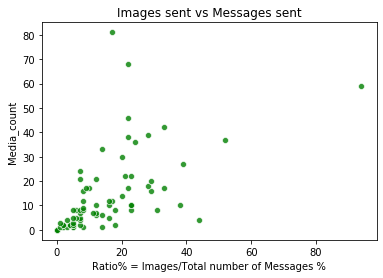

In [63]:
sns.scatterplot(x = 'Ratio%', y='Media_count', data=Media_df, color='Green', alpha = 0.8)
plt.title('Images sent vs Messages sent')
plt.xlabel('Ratio% = Images/Total number of Messages %')
plt.show()

In [64]:
Media_df.reset_index(inplace=True)
Media_df

Sender  Media_count  Ratio%
0        +91 99184 37313            0       0
1                  Swati            0       0
2   Siddhant Shrivastava            0       0
3                Vinayak            0       0
4           Michael Lumb            0       0
5                Guru Ex            0       0
6               Durga Ex            0       0
7              Dalvendra            0       0
8                Archana            0       0
9            Aparna Saha            0       0
..                   ...          ...     ...
74           Amit Chopra           33      14
75         Sourabh Patil           36      24
76        Lakshminarayan           37      52
77           Rajashekhar           38      22
78                Bharat           39      28
79        Sayan Banerjee           42      33
80         Shaileshwaram           46      22
81         Uttam Agrawal           59      94
82                Mazhar           68      22
83            Raj Gaurav           81      17

[84 rows x 3 columns]

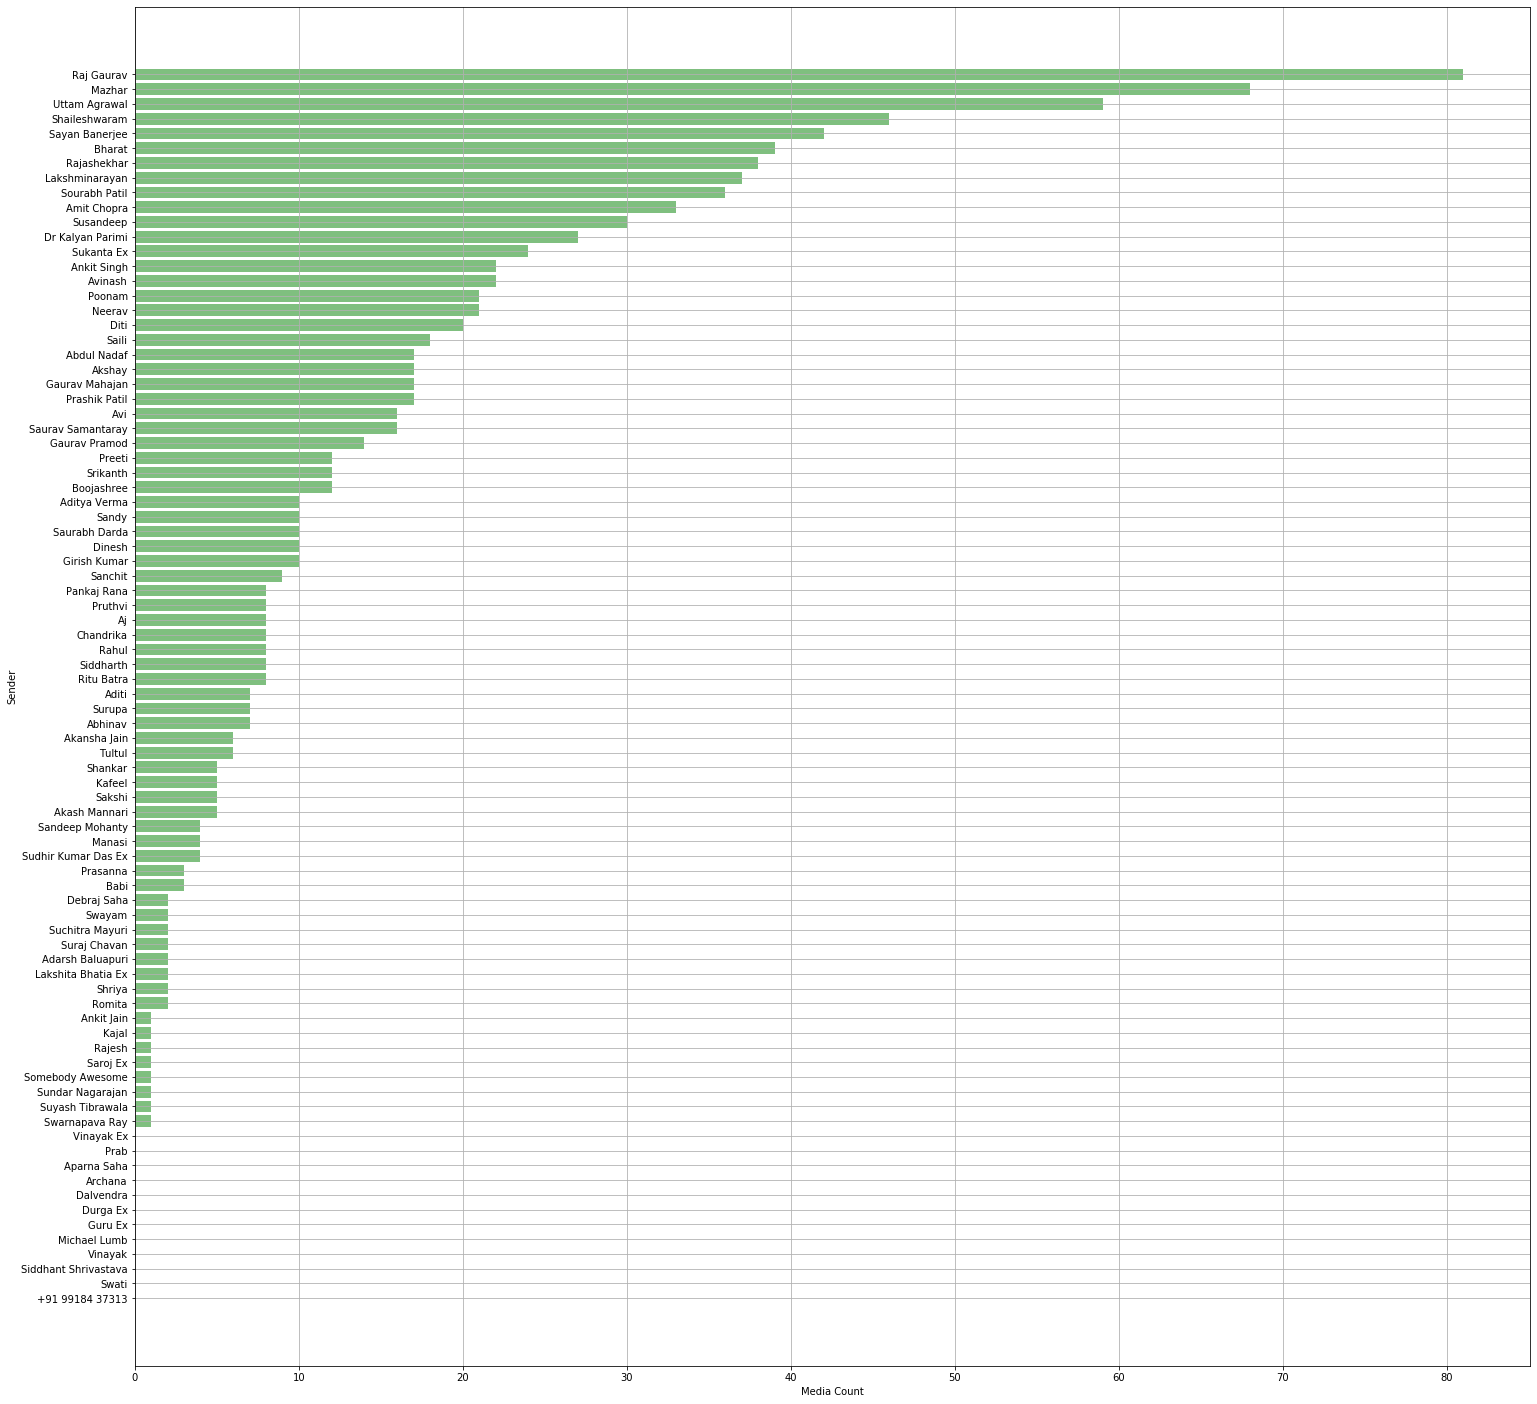

In [65]:
plt.figure(figsize=(25, 25))
plt.barh(Media_df['Sender'], Media_df['Media_count'], color='green', alpha = 0.5)
plt.ylabel("Sender")
plt.xlabel("Media Count")
plt.xticks(ha="center")
plt.grid(True)
plt.show()

## ------------------------------------------

## Rescale below plot, msgs range 700 while media ranges to 100 only

In [66]:
sender_count_df

sender  count
0     +91 99184 37313      2
1             Vinayak      2
2        Michael Lumb      2
3                Prab      3
4            Durga Ex      6
5          Vinayak Ex      8
6             Guru Ex      8
7    Sundar Nagarajan      8
8         Aparna Saha     10
9           Dalvendra     10
..                ...    ...
74        Abdul Nadaf    203
75        Rajashekhar    207
76  Saurav Samantaray    213
77               Babi    234
78      Shaileshwaram    252
79        Amit Chopra    276
80             Neerav    337
81             Mazhar    372
82         Sukanta Ex    376
83         Raj Gaurav    560

[84 rows x 2 columns]

Can make a stacked plot as well

Plot below does not have right scales

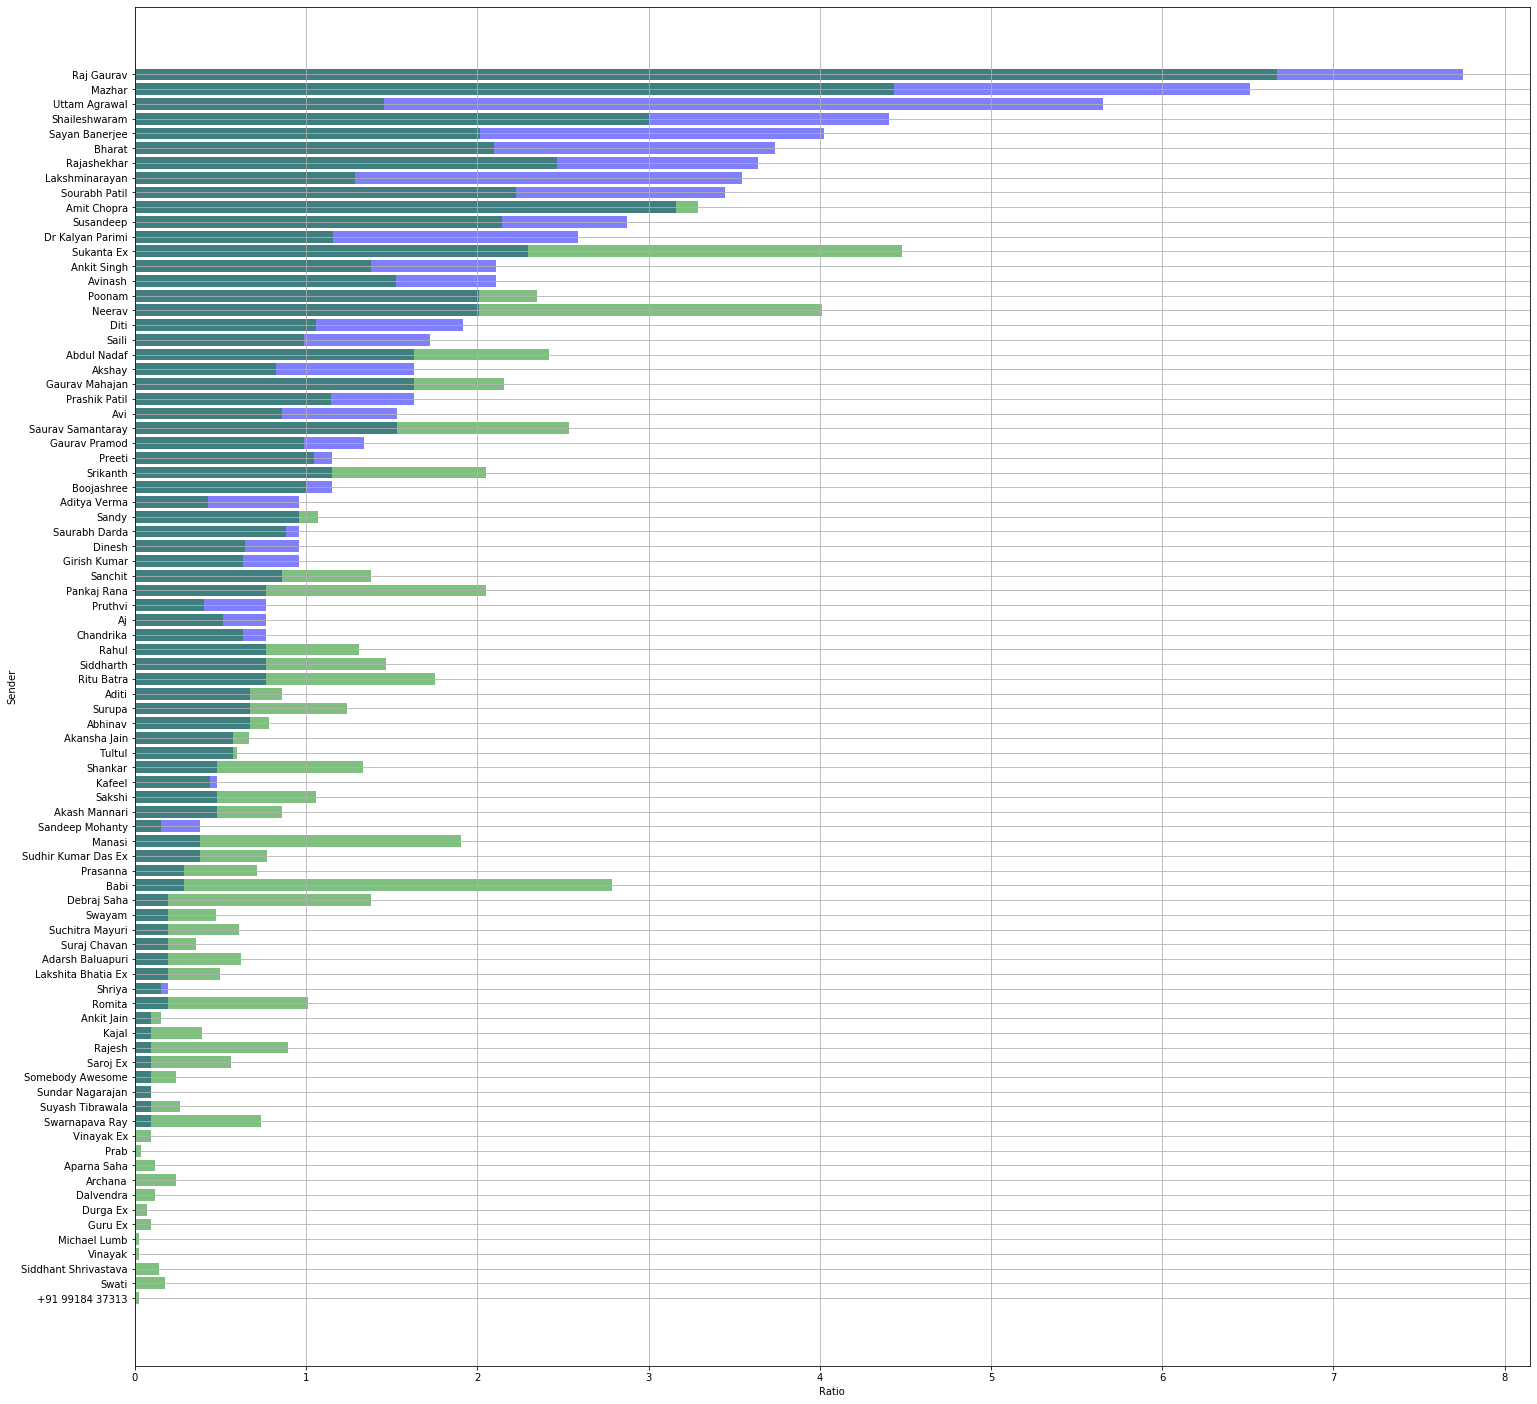

In [67]:
total_msgs = sender_count_df['count'].sum()
total_media = Media_df['Media_count'].sum()
plt.figure(figsize=(25, 25))

plt.barh(Media_df['Sender'], Media_df['Media_count']*100/total_media, color='blue', alpha=0.5)
plt.barh(sender_count_df['sender'], sender_count_df['count']*100/total_msgs, color='green', alpha=0.5)
plt.ylabel("Sender")
plt.xlabel("Ratio")
plt.xticks(ha="center")
plt.grid(True)
plt.show()

## Fix Scale above, use stacked plot
## -------------------------------------------------------------------

Emoji Analysis

In [68]:
# Find all unique emojis
# Who used most unique emojis
# Who used most emojis
# Emoji usage stats

In [69]:
member_emoji_count={}
for key in member_text:
    member_emoji_count[key] = emoji.emoji_count(member_text[key])
#member_emoji_count

In [70]:
emoji_df = pd.Series(member_emoji_count)
emoji_df = pd.DataFrame(emoji_df)
emoji_df.reset_index(inplace=True)
emoji_df.columns= ['Sender', 'Count']
emoji_df.sort_values('Count', ascending=True, inplace=True)
emoji_df.reset_index(inplace=True,drop=True)

In [71]:
emoji_df

Sender  Count
0       Michael Lumb      0
1    +91 99184 37313      0
2           Durga Ex      0
3   Sundar Nagarajan      0
4            Guru Ex      0
5        Aparna Saha      0
6             Rajesh      0
7         Vinayak Ex      0
8            Vinayak      0
9               Prab      0
..               ...    ...
74       Amit Chopra     46
75           Sanchit     47
76    Gaurav Mahajan     49
77           Avinash     49
78     Prashik Patil     51
79           Shankar     56
80     Sourabh Patil     59
81       Rajashekhar     60
82            Neerav     62
83        Ritu Batra     64

[84 rows x 2 columns]

In [72]:
# plt.figure(figsize=(25, 25))
# plt.barh(sender_count_df['sender'], sender_count_df['count']*100/total_msgs, color='green', alpha=0.5)

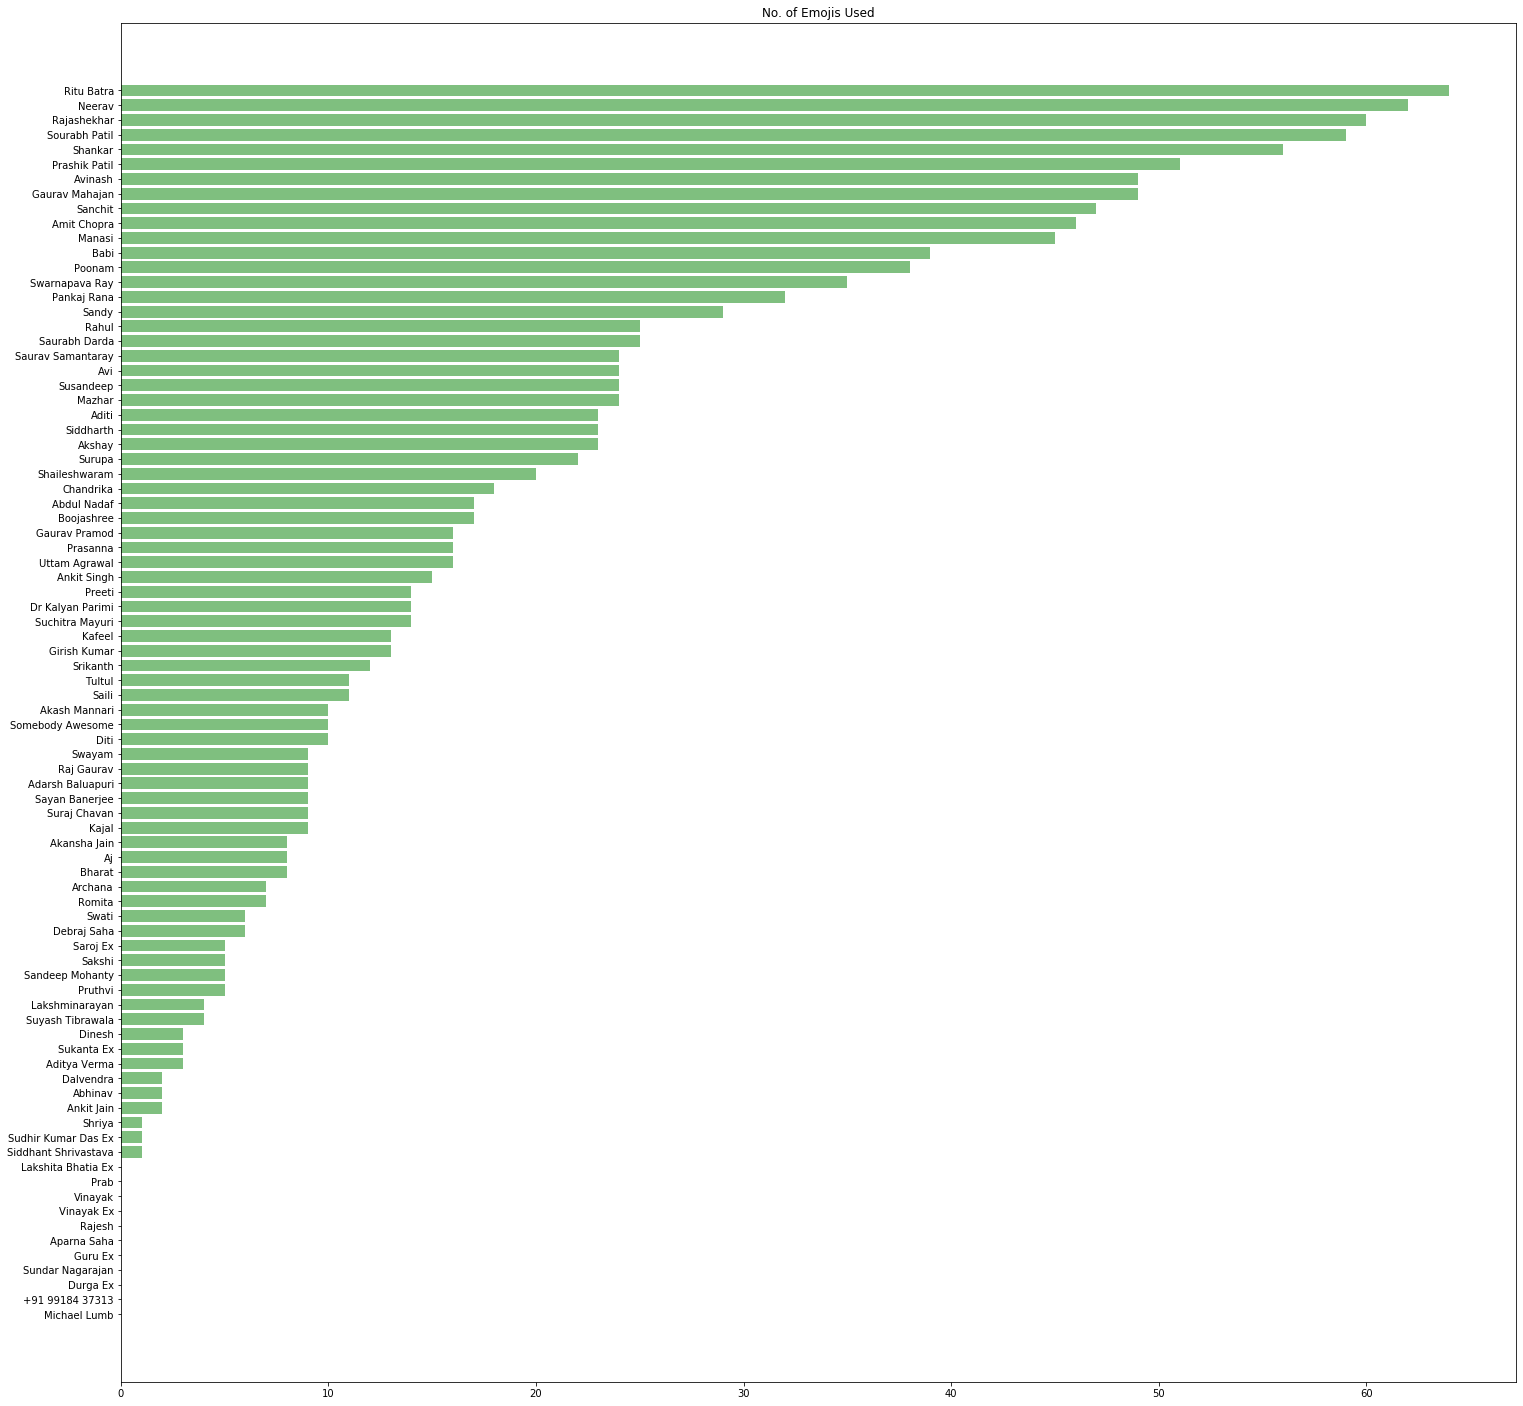

In [73]:
plt.figure(figsize=(25, 25))
plt.barh(emoji_df['Sender'], emoji_df['Count'], color='green', alpha=0.5)
plt.title('No. of Emojis Used')
plt.show()

In [74]:
def extract_emojis(s):
      return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [75]:
df_t['Emojis'] = df_t.Text.apply(extract_emojis)

In [76]:
# df_t.head()

--------------------------

In [77]:
member_emoji_use = {}
for key in member_text:
    member_emoji_use[key] = ''

In [78]:
# member_emoji_use ## Empty dict right now with keys as names of all people

In [79]:
for ind, row in df_t.iterrows():
    member_emoji_use[row['Sender']] += df_t.loc[ind, 'Emojis']

In [80]:
# member_emoji_use ## Dictionary of all emojis used in sequence

In [81]:
set('👌😔😔👍😟😟👌☺☹☹☹🤢🤢🤢👍👍👍🤢🤢👍👍👌👌👍😂😂😂☺☺😓😓😓👆👆🧐🧐🧐😈😈🥶🥶🥶😓😓☺☺☺👍👍')

{'☹', '☺', '👆', '👌', '👍', '😂', '😈', '😓', '😔', '😟', '🤢', '🥶', '🧐'}

In [82]:
member_unique_emojis = member_emoji_use
for key in member_unique_emojis:
    member_unique_emojis[key] = set(member_unique_emojis[key])
    member_unique_emojis[key] = len(member_unique_emojis[key])

In [83]:
# member_unique_emojis Dictionary count of unique emoji use

In [84]:
unique_emoji_count_df = pd.DataFrame(pd.Series(member_unique_emojis), columns= ['Count'])
unique_emoji_count_df.reset_index(inplace=True)
unique_emoji_count_df.columns=['Sender', 'UniqueCount']
unique_emoji_count_df.sort_values(by='UniqueCount',ascending=True, inplace=True)

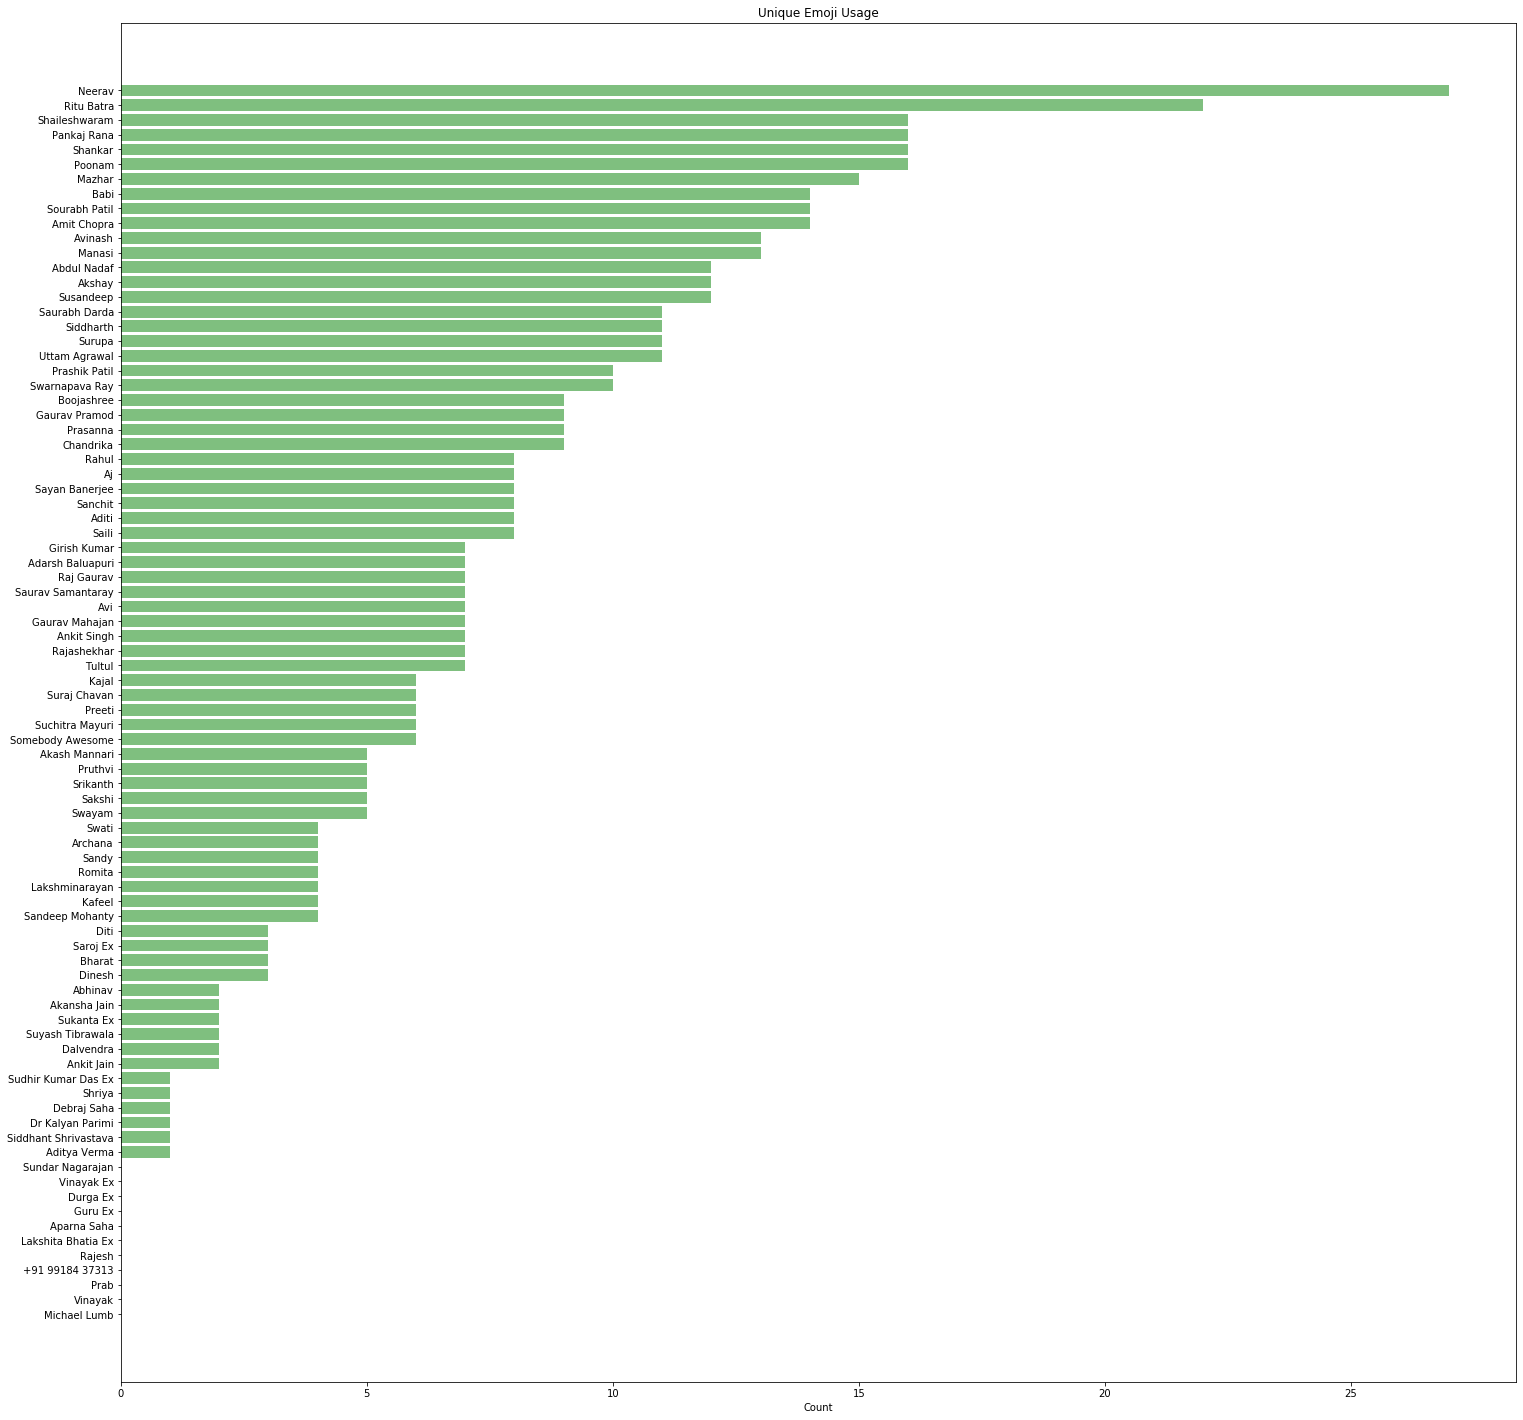

In [85]:
plt.figure(figsize=(25, 25))
plt.barh(unique_emoji_count_df['Sender'], unique_emoji_count_df['UniqueCount'], color='green', alpha=0.5)
plt.title("Unique Emoji Usage")
plt.xlabel('Count')
plt.show()

## --------------------------------------- Testing Zone
_----------

Creating a Corpus

In [ ]:
# corpus = []
# for ind, row in df.iterrows():
#     text = df.loc[ind, 'Text']
#     corpus.append(text)

In [ ]:
# corpus

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(stop_words='english')
# X = vectorizer.fit_transform(corpus)

In [ ]:
# vectorizer.get_feature_names()

In [ ]:
# print(len(vectorizer.get_feature_names()))
# print(X.toarray())
# print(X.toarray().shape)

Will add more above
## -------------
